# A Lifecycle Analysis of Unemployment Benefits
Daniel Heimgartner (41644)

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Note
My personal objective for this course was first and foremost to bring macro economic theory to the computer and hence data. I've chosen to follow the course by learning Python instead of Matlab as I like the idea of open source and the similarity between Python and R. Additionally, Python has a well established scientific community and packages such as `numpy`, `scipy` and `pandas` bring functionality very similar to matlab. Further, Thomas J. Sargent and John Stachurski provide a very well-rounded [online](https://python-programming.quantecon.org/index_toc.html) learning environment, where they first introduce the basics of the programming language and at later stages elaborate on various modeling tools applicable to macroeconomics. Their webpage and the course complement each other very nicely and I can recommend learning Python.

Jupyter notebooks are really great for generating reproducable reports. Creating a bibliography and citing correctly is painful on the other hand. I have therefore chosen to simply link all the relevant sources which makes them directly accessible.

## Introduction
I'm fascinated by the paradigm of *Dynamic Programing* and found it useful to apply the learnings in a finite horizon, discrete modeling framework. I believe that the idea of representative agents introduces a large bias in economic policy making. Distributions over housheolds matter and as a consequence agents should be modeled as heterogeneous individuals they are. In order to understand the welfare implications of unemployment benefits it is crucial to understand the wealth distribution. Certainly, the households with little asset holdings are impacted differently when they face unemployment risk compared to households with a big asset buffer.

My personal objectives and my strategy for this delivery were as follows:
1. Replicate the paper by [Imrohoroglu et al. (1995)](https://link.springer.com/article/10.1007/BF01213942) translating the matlab code provided by Markus Pettersson. This yielded the learning, that I needed to understand first, the original paper and second, each line of code and the solution algorithm as implemented in matlab.
2. Understand and experiment with the calibration process of the model by matching the parameters to the Swedish case.
3. Add a twist to the model. I achieve this by an alternative transfer schedule for unintended bequests and the perspective on unemployment benefits rather than social security. Further, I relax the assumption of ex ante homogeneous agents and introduce wealth heterogeneity by birth which allows me to gauge the role of inheritance on social benefits and wealth distribution over the lifetimes. It helps me to understand whether inheritance can shift optimal outcomes and whether policy makers should incorporate the aspect into their decision making.
4. Discuss extensions from a theoretical implementation point of view. Initially, I was eager to extend the model along multiple dimensions such as endogenizing labor supply decisions. It made me sit a weekend thinking about setting up the labor choice grid and adjusting the state space grid and the loop and all that before reaching out to Markus and asking for advise. It made me also aware of the problem known as "the curse of dimensioanlity" in the Value function iteration approach which slows "quadratically" (depending on the grid size) down, when introducing new states. I incorporate the thinking process towards the end of this paper, where I comment on multiple potential extensions.

Following the paper by [Imrohoroglu et al. (1995)](https://link.springer.com/article/10.1007/BF01213942) I set up a model where agents face mortality and employment risks and decide over their consumption and saving profiles. The government has the task to set up and finance both an unemployment benefit and social security scheme. The interesting aspect of the framework is that heterogeneity is introduced over the lifecycle, because the agents' decisions differ depending on their employment history. This gives rise to a wealth distribution which is an appealing aspect of the model on its own and motivated me to explore the importance of bequests in light of inequality.

In that environment the authors study the implications of different social security regimes and try to gauge the optimal replacement ratio defined as the fraction of average lifetime income available when retired. As already mentioned, I use the framework to study government interventions from another perspective, where I try to argue for the optimal unemployment replacement ratio. Further, I introduce ex ante heterogeneity and check whether the implications change. The study is performed to align with the Swedish economy.

The introduction of ex ante heterogeneity should not be supposed to alter the outcome considerably. This is because, on the one hand, inheritence is highly skewed leaving most of the households with zero or only marginal starting capital. On the other hand, possessing assets when entering the economy relaxes the non-negativity constraint of the young agents allowing them to consume more at early stages or save less which further reduces the possibility of overaccumulation in the economy. If at all, ex ante heterogeneity should hence reduce the importance of the government intervention. Still, the model allows me to track the wealth distribution for differnt cohorts and I find it interesting to see, wheter heterogeneity by birth induces visible differences at later ages.

## Model
The model can be referred to as applied general equilibrium model where households face consumption and savings decisions, stochastic employment opportunities and an uncertain lifetime. Households do not have a labor choice but labor is introduced indivisible. Further, some individuals experience early death which leaves unintended bequests. The (age) conditional probability of surviving is known. The government's task is to cover both unemployment and social security benefits by running a balanced budget. The story of the model is hence laid out: People may consume, people may save and people may die. Their choices are governed by being, on the one hand, aware of these uncertainties and, on the other hand, knowing that there is a safety net provided by the state crowding-out personal precautionary measures. The aim of my study is to understand the optimal level of unemployment benefits. I now introduce each player in the economy individually.

Individuals maximize expected, discounted lifetime utility

\begin{equation}
E \sum_{j=1}^{J}\beta^{j-1}\left[\prod_{k=1}^{j}\psi_k\right]\frac{c_{j}^{1-\gamma}-1}{1-\gamma}
\end{equation}

where $\beta$ is the discount factor, $\psi$ is the conditional probability of survival from $j-1$ to $j$, $c_j$ is consumption and $\gamma$ the coefficient of (constant) relative risk aversion governing the curvature of the utility function and therefore the intertemporal elasticity of substitution. Originally, households are "ex ante identical" which refers to the assumption, that new individuals enter the economy with identical (zero) asset holdings. It could be interesting to relax this assumption and explore the implications of inequality by birth due to bequests as an example. I will follow this extension as already outlined. The distribution of individuals over the different age-groups is given by the fraction $\mu_j$. Total population size is normalised to 1.

Further, individuals live for a total of $J$ periods after which death is certain. From the age of $j^*$ they receive social security benefits $b$. Households are borrowing constrained which implies that savings (and consumption) can not be negative. During working-age, people face stochastic employment opportunities and are in one of the two employment states $s \in S = \{e, u\}$. The probability of being in either of the states is governed by the first-order Markov stochastic process characterized by the row-identical 2x2 matrix $\Pi(s',s) = [\pi_{ji}], i,j = e,u$ where $\pi_{ij} = Prob{s_{t+1}=j|s_t=i}$. Row-identical implies that being employed (or unemployed) in the next period does not depend on the employment state in this period. In other words, there is no unemployment persistency. More on that matter in the **Calibration** section.

The budget constraint is characterised by

\begin{equation}
y_j=(1+r)y_{j-1}+q_j-c_j+ \mathbb{1}{\{\text{if }j=1\}} t, \hspace{1cm} \text{$y_0$ given}
\end{equation}

where $r$ is the real interest rate $y_j$ the savings choice (asset holdings) at the end of each period, $q_j$ is the disposable income and the indicator function specifies that only newborn individuals get a transfer $t$ which is determined by the total amount of unintentional bequests. There are many different possible transfer technologies specifying the distribution of the bequests. I have chosen this specification as it seems the most plausible and as it weakens the non-negativity constraint especially felt by young individuals.

Disposable income $q_j$ is contingent on the employment state $s$ and reads

\begin{equation}
q_j =
    \begin{cases}
        (1-\tau_s-\tau_u)w_{j}^{e} & \text{if $j < j^*$, $s=e$}\\
        w_{j}^{u}                  & \text{if $j < j^*$, $s=u$}\\
        b                          & \text{if $j \geq j^*$}
    \end{cases}
\end{equation}

where 

\begin{align}
w_{j}^{e}=& w \varepsilon_j \hat{h}\\
w_{j}^{u} =& \xi w \hat{h}\\
b =& \frac{\theta}{(j^* - 1)} \sum_{j = 1}^{j^* - 1} w_{j}^{e}
\end{align}

In particular, $\hat{h}$ is exogeneously given which closes the channel for households to adjust labor supply in resonse to tax changes. However, I believe that job markets are characterized by a "take it (the 8 hours) or leave it" negotiation process which aggravates nuanced labor supply decisions. Some friends and me fitted a model with labor choices to the US and the different tax regimes of its counties and found that labor is totally inelastic to tax rates. People work their 40 hours a week if employed. I therefore take the abstraction of indivisible labor as realistic.

These equations encompass the key parameters of my study, namely the set of feasible government policies $\Omega = \{\xi, \tau_u, \theta, \tau_s\}$. Whereas [Imrohoroglu et al. (1995)](https://link.springer.com/article/10.1007/BF01213942) focus on the tuple $(\theta, \tau_u)$ I will concentrate on $(\xi, \tau_s)$ where $\xi$ pins down the replacement ratio and hence unemployment benefits. As the efficiency profiles are normalised to one the benefit can be interpreted as the ratio of a typical (average efficient) worker's labor income. As already mentioned, the government needs to run a balanced budget which exogeneously determines the tax rates as a function of benefit programm's parameters $\theta$ and $\xi$ and the efficiency profiles $\varepsilon$, age-distribution $\mu$ und unemployment risk $\pi$. The derivation of the tax rates is straight forward and follows from the condition that government revenue must equal government expenditures.

\begin{align}
\underbrace{
\phantom{\sum_{j}^{j^*-1}}
\tau_u w N}_{\text{government revenue}} =& \underbrace{
\xi w \hat{h} (1- \pi) \sum_{j}^{j^*-1} \mu_j}_{\text{government expenditure}}\\
\tau_s w N =& b \sum_{j = j^*}^{J} \mu_j
\end{align}

These conditions can be rearranged to have the tax rates on the LHS and subsequent substitution of wage rates and aggregate labor (see section **Equilibrium**) pins down the rates exogeneously

\begin{align}
\tau_s =& \frac{\theta}{(j^{*}-1) \pi}\frac{\left( \sum_{j=1}^{j^{*}-1} \varepsilon_j \right)
\left( \sum_{j=j^{*}-1}^{J} \mu_j \right)}
{\sum_{j=1}^{j^{*}-1} \mu_j \varepsilon_j}\\
\tau_u =& \xi \frac{1- \pi}{ \pi}
\end{align}

The employment risk introduces a full wealth distribution because employed and unemployed have different saving's opportunities which leaves the asset holdings as a function of the full employment history. The wealth distribution can be found by foreward iteration once the optimal saving policies have been determined. $\lambda_j(y,s)$ keeps track of the housholds at age $j$, with asset holdings $y$ and in employment state $s$. Knowing the policy of optimal next period assets $y'(y,s)$ given todays state I can update $\lambda$ with help of the conditional sum according to (which is almost an accounting identity)

\begin{align}
\lambda_{j+1}(y',e) =& \pi \sum_s \sum_{y:y'=y_j(y,s)} \lambda_{j}(y,s)\\
\lambda_{j+1}(y',u) =& (1-\pi) \sum_s \sum_{y:y'=y_j(y,s)} \lambda_{j}(y,s)
\end{align}


Firms are competitive and maximize profits employing a standard Cobb-Douglas production function with neither technological shocks nor growth $Q = f(K,N) = BK^{1-\alpha}N^{\alpha}$ where $B$ governs the production efficiency and $\alpha$ is the labor's share of output. As a sideremark, I figured that introducing stochastic productivity makes wage rates contingent on the state of nature and thus the tax rates become endogeneous. The maximization problem gives rise to the following FOCs where $\delta$ is the depreciation rate

\begin{align}
r =& (1-\alpha) B \left(\frac{K}{N}\right)^{-\alpha} - \delta\\
w =& \alpha B \left(\frac{K}{N}\right)^{1-\alpha}
\end{align}

As a welfare measure to evaluate different policies, the average utility can be defined as

\begin{equation}
W(\Omega)=\sum_{j=1}^{J} \sum_y \sum_s \beta^{j-1}\left[\prod_{k=1}^{j}\psi_k\right]\lambda_j(y,s)U(C_j(y,s))
\end{equation}

where $C_j(y,s)$ is the optimal policy.

The derivation of all the formulas is quite simple with the complicating factor of keeping track of the distributions. It simplifies the reading of the formulas considerably if one recalls that $\mu$ keeps track of the age-distribution of households and is simply exogeneously given, whereas $\lambda$ tracks the heterogeneity within an age group and can be defined once policy rules have been computed. Heterogeneity is characterised by asset holdings and employment state. This understanding alleviates the aggregation in the **Results** section and should be kept in mind.

## Equilibrium
I first formulate the household problem as a Bellman equation. Recall, that households maximize the expected, discounted lifetime utility by choosing consumption and asset holdings (savings) such that their BC is fulfilled. I reformulate the problem by substituting the rearranged BC so that households choose next period asset holdings instead of consumption. Households enter each period with a predetermined amount of assets and are either employed or unemployed. The state variables are thus $(y,s)$ which constrain the set for the choice variable $\Omega_j(y,s)$ consisting of all feasible next period asset choices such that both consumption and assets remain positive.

\begin{equation}
V_j(y,s) = \max_{y'\in \Omega_j(y,s)}\left\{U(y') + \beta \psi_{j + 1} E_{s'} V_{j+1}(y',s')\right\}
\end{equation}

where the expectation operator is with regard to feature employment states

\begin{equation}
E_{s'} V_{j+1}(y',s') = \pi V_{j+1}(y',e) + (1-\pi) V_{j+1}(y',u)
\end{equation}

Importantly, the expectation is not conditional on the current state which simplifies the problem. The problem can be solved by backward induction because death is certain at $J+1$ which leaves the agent to maximize utility given the remaining assets in the last period.

Optimal behaviour needs to be consistent with aggregate market outcomes. A stationary equilibrium fulfills the follwoing clearing conditions:

- Factor market clearing: $K = \sum_j \sum_y \sum_s \mu_j \lambda_j(y,s) y_{j-1}$ and $N=\sum_{j=1}^{j^*-1}\mu_j \lambda_j(y, s=e)\varepsilon_j \hat{h}$
- Goods market clearing: $Y = C + I$
- Law of motion needs to hold: $K' = (1-\delta)K + I$
- Next periods bequests: $T' = (1+r)\sum_{j=1}^{J}\mu_j(1-\psi_{j+1})\left[\sum_y \sum_s \lambda_j(y,s)Y_j(y,s)\right]$

Additionally, the implied factor prices $\{w,r\}$ lead to the above described outcome.

## Algorithm
The below sections show how I implement the theoretical model in Python. The code is structured as follows: The **Model Object** contains all the important parameters and key equations (utility, exogeneous variables) of the lifecycle model. This is a so-called `class` (or instance) which is the key building block of the paradigm called *Object Oriented Programming* (OOP). OOP allows the modeler to gather key variables and methods (functions) in a new object which can be passed to other functions or classes. This enables a neater code structure. **Calibration** calibrates the key paramters which subsequently define the lifecycle model instance. **Simulation** contains the main function, basically solving the model by means of *Value Function Iteration* (VFI). Also, a function solves the model repeatedly by looping over the policy vector ($\xi$). **Results** aggregates or restructures the output of the algorithm and presents the main findings. A description of what each code section does can be found at the top of each cell. I consider the comments in the code as part of the text.

## Model Object

In [2]:
# -------------------------------------
# We build a model class containing all these parameters and variables. The lifecycle_model objects allows us to code in a more 
# flexible manner - we can simply update the model parameters (s.a. the efficiency profiles, survival probabilites, etc.) and
# the script adjusts automatically to these changes!

# Output: lifecycle_model class containing all the parameters, the exogeneous variables and the RHS of the Bellman equation
# -------------------------------------

import pandas as pd
import numpy as np
import scipy as sp

class lifecycle_model:
    """
    Model object, containing all the parameters, the exogeneous variables and a utility method.
    """
    def __init__(self, ρ, ψ, μ, J, jstar, β, γ, hhat, π, ϵ, α, δ, ξ, θ, dmin, dmax, nd):
        "Initiate parameters"
        # Demographics
        self.ρ, self.ψ, self.μ = ρ, ψ, μ
        
        # Households
        self.J, self.jstar, self.β, self.γ, self.hhat, self.π = J, jstar, β, γ, hhat, π
        
        # Efficiency profile
        self.ϵ = ϵ
        
        # Production
        self.α, self.δ = α, δ
        
        # Government
        self.ξ, self.θ = ξ, θ
        
        # Technical parameters
        self.dmin, self.dmax, self.nd = dmin, dmax, nd
        
    def N(self):
        "Define exogeneous aggregate labor (as a function of parameters)"
        return self.π * sum(self.μ * self.ϵ * self.hhat)
    
    def B(self):
        "Define TFP (as a function of parameters and N)"
        return 3 ** (self.α - 1) * self.N() ** (-self.α)
    
    def utility(self, c):
        "Utility function"
        if self.γ == 1:
            U = np.log(c)
        else:
            U = (c ** (1 - self.γ) - 1) / (1 - self.γ)
        return U
    
    def τ_u(self):
        "Define tax rate to cover unemployment benefits"
        return self.ξ * (1 - self.π) / self.π
    
    def τ_s(self):
        "Define tax rate to cover social benefits"
        return self.θ / (self.jstar - 1) * 1 / self.π * (sum(self.ϵ) * sum(self.μ[self.jstar-1:self.J])) / (sum(self.μ * self.ϵ))
        
    def asset_grid(self):
        "Construct asset (savings) grid by quadratic oversampling - the choice variable"
        return np.linspace(self.dmin ** (1 / 2), self.dmax ** (1 / 2), self.nd) ** 2

## Calibration
In order to obtain numerical solutions to the model and conduct welfare analysis of different unemployment benefit policies, I choose particular values for parameters of the model. The model is calibrated with periods corresponding to one year. This implies that individuals are either employed in that given year or not and average duration of unemployment depends on the Markov transition probabilites. It should be recommended to employ shorter modeling periods to match employment migration more closely. The modeling parameters are chosen to align with the case of Sweden although the success of the calibration is not strengthened by comparing the implied wealth distributions to empirical counterparts.

Individuals are born into the economy with age of 21 and they live for a maximum of $J = 65$ periods which thus corresonds to 85. Households are forced into retirement at the age of 65 $(j^* = 45)$ which corresponds to the guaranteed pension scheme in Sweden. After the age of 85 death is certain. The sequence of conditional survival probabilities $\{\psi\}_{j=1}^{J}$ is taken from [statistikdatabasen](http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101I/LivslangdEttariga/table/tableViewLayout1/). The share of age groups in the population, $\mu_j$ follows from the relation $\mu_{j+1} = ((\psi_{j+1})/(1+\rho))\mu_j$ where $\sum{j}^{J}\mu_j = 1$ and $\rho$ is the population growth rate. The equation can be understood as law of motion for the household age composition. I take the population growth rate from the [worldbank database](https://www.worldbank.org/) $\rho = 0.012$. The efficiency index $\varepsilon$ captures the age-dependent labor productivity and is taken from [Hansen (1993)](https://econpapers.repec.org/article/jaejapmet/v_3a8_3ay_3a1993_3ai_3a1_3ap_3a71-80.htm). The data is old and estimated for the US. Nevertheless, I take the values as proxies assuming that the age-dependent labor efficiency is shared between the US and Sweden and time-constant (or at least shifts in a parallel fashion). Values are interpolated in-between years and normalised to average 1 between $j = 1$ and $j = j^*-1$ which is the working age. As already introduced, workers provide raw hours of work equal to 40 hours a week. This information pins down the exogeneous aggregate hours provided which is $\pi h^* \sum_{j = 1}^{j^*-1}\mu_j \varepsilon_j$. The unemployment insurance replacement ratio, the key parameter of interest in this study, takes values between 0 and 1 at 0.1 increments. $\theta$ is set to 0.6 which corresponds to $60 \%$ of average working-age earnings which suits the swedish case according to [Schermann (1999)](https://www.ilo.org/wcmsp5/groups/public/---ed_protect/---soc_sec/documents/publication/wcms_207699.pdf).

Following the original paper and paying tribute to the Kaldor facts, I define the following parameters: $\alpha$, the labor share of GNP is 0.64 and the technology parameter B in the production function is fixed at 1.431 which corresponds to a capital output ratio of 3 when output is normalised to 1. The depreciation rate $\delta$ is 0.05 which is the rate defined for fixed assets according to [this](https://taxsummaries.pwc.com/sweden/corporate/deductions) report.

The probably most disputed parameter is the intertemporal elasticity of substitution $\gamma$ . I follow the original paper and set it to 2. Similar, the discount factor $\beta$ is 1.011. [Imrohoroglu et al. (1995)](https://link.springer.com/article/10.1007/BF01213942) argue for their critical parameter choices by reproducing the empirical wealth to income ratio for the US. The Markov transition matrix governing the (un-) employment probabilities is defined as row-identical 2x2 matrix with row entries $[0.94, 0.06]$ and matches roughly the [Swedish unemployment rate](https://www.statista.com/statistics/375284/unemployment-rate-in-sweden/). The matrix being row-identical implies that the transition probabilities are not state contingent. It would be a nice extension to match the stochastic process with empirical data following the Tauchen method as an example. However, scrutinizing the impact of unemployment persistency for optimal benefits should be done by leveraging smaller model periods. As indicated by [Imrohoroglu et al. (1995)](https://link.springer.com/article/10.1007/BF01213942) the average duration of unemployment corresponds to $1/(1-0.94)$ periods which is longer than a year. Incorporating persistency would further increase its average duration.

I try to match some simplyfied inheritance facts for the case of Sweden derived from [Elinder et al. (2018)](https://www.sciencedirect.com/science/article/pii/S0047272718301257). The ex ante distribution of wealth is achieved by introducing a distribution in the $\lambda$ array for the newborn cohort. The exact distribution is difficult to match and my attempt is based on the following information: The authors mention that inheritance is highly skewed (with $19 \%$ inheriting nothing at all). Their reported distribution indicates that a very big mass inherits only marginal amounts. For simplicity and by eyeballing, I define that the cohort entering the first period unemployed ($6 \%$ of the people) get 400k SEK whereas $14 \%$ of the first period employed get 200k SEK. This calibration attempt is not too scientific but aligns with the fact that inheritance is highly skewed and sets the amount of the bequest in somewhat realistic proportions. Defining bequests relative to income, I set the ratios to be 4/6 and 2/6 respectively, assuming a yearly income of 600k SEK. These correspond to the 126th and 89th value of our defined asset grid.

In [3]:
# -------------------------------------
# We here calibrate and specify and calibrate all modeling parameters as defined in our paper. The here defined values define
# subsequently the lifecycle model object! Also, output matrices are defined.

# Input:  Calibration.xlsx file containing exogeneous life-cycle data
# Output: Calibrated parameters for model class
# -------------------------------------

from scipy.interpolate import interp1d

# Demographics ----
ρ = 0.012
ψ = pd.read_excel('Calibration.xlsx', sheet_name='Faber_own', usecols='F')[22:].to_numpy(dtype='float32')
ψ = np.concatenate(ψ)
μ = np.cumprod(ψ / (1 + ρ)) / sum(np.cumprod(ψ / (1 + ρ)))

# -------------------------------------

# Households ----
J     = 65
jstar = 45
β     = 1.011
γ     = 2
hhat  = 0.4
π     = 0.94

# -------------------------------------

# Efficiency Profile ----
# As we assume that the agents enter the economy with age 20 and retire with age 65 we should interpolate the efficiency profiles
# given by Hansen (1993) for j = 1:(jstar-1).
efficiency  = pd.read_excel('Calibration.xlsx', sheet_name='Hansen (1993)', usecols='B:C')[4:].to_numpy(dtype='float32')
f           = interp1d(efficiency[:,0], efficiency[:,1], kind='linear')
ϵ           = np.zeros(J)
ϵ[:jstar-1] = f(list(range(1, jstar))) # range(x, y) does include x but not y!

# Normalize
ϵ           = ϵ / (sum(ϵ * μ)/sum(μ[:jstar]))

# -------------------------------------

# Production ----
α = 0.64
δ = 0.08
# N and B are directly defined in class

# -------------------------------------

# Public Sector ----
ξ = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
θ = 0.6
# Tax rates are directly defined in class

# -------------------------------------

# Technical Parameters ----
dmin = 0
dmax = 15
nd   = 601
# The asset (savings) grid is directly defined in class

# -------------------------------------

# Output matrices ----
# Here, we build the containers for all the endogeneous variables. F.ex. the policy functions during employment are three
# dimensional: they are nd x J x len(ξ)...
ypol_e    = np.empty((nd, J, len(ξ)))
ypol_u    = np.empty((nd, J, len(ξ)))
cpol_e    = np.empty((nd, J, len(ξ)))
cpol_u    = np.empty((nd, J, len(ξ)))
λ_e       = np.empty((nd, J, len(ξ)))
λ_u       = np.empty((nd, J, len(ξ)))
q_e       = np.empty((J, len(ξ)))
q_u       = np.empty((J, len(ξ)))

K         = np.empty(len(ξ))
T         = np.empty(len(ξ))
r         = np.empty(len(ξ))
w         = np.empty(len(ξ))
Y         = np.empty(len(ξ))
C         = np.empty(len(ξ))
W         = np.empty(len(ξ))

In [4]:
# Initiate lifecycle_model class ----
model = lifecycle_model(ρ=ρ, ψ=ψ, μ=μ, J=J, jstar=jstar, β=β, γ=γ, hhat=hhat, π=π, ϵ=ϵ, α=α, δ=δ, ξ=ξ, θ=θ, dmin=dmin, dmax=dmax, nd=nd)

## Simulation
The cell below implements the contraction mapping $V'(K,T) = T(V(K,T))$ until the above outlined equilibrium conditions are reached. The algorithm is commented in detail below. However, the most crucial part of the function can be found under `Solve Bellman equation ----` which implements the value function iteration finding optimal policy rules. There, I iterate over the grid of state variables, more precisely each possible asset state and fill in the value functions for the employment state in a vectorized fashion. Convergence is reached by a bisection method, where I update the initial guesses of capital and bequests according to a simple weighting scheme. The algorithm stops either after a maximum number of iterations or after a desired level of precision has been achieved.

Moreover, the function takes the two arguments $\lambda_0$ and $\lambda_1$ which are 1 dimensional arrays discribing the ex ante heterogeneity of the newborn agents as outlined above. Once newborn agents enter the economy with "outside" capital the market clearing condition needs to be adjusted (as aggregate capital is computed from the discounted aggregated policy function for next period capital and hence does not incorporate the outside capital).

In [5]:
# -------------------------------------
# This cell defines the function solve_model which basically solves the Bellman equations (until a certain convergence
# criterion is reached). Recall, that we evaluate the value function for different government policy parameters (θ, ξ). The loop
# over these different values happens outside this function!

# The solution algorithm has the following structure:
# (i)    guess K and T
# (ii)   calculate factor prices from firms' FOCs
# (iii)  solve the household problem using dynamic programming
# (iv)   calculate the distribution of households across asset levels and employment statuses for all ages
# (v)    aggregate savings to get new K and T
# (vi)   update guessed K and T using bisection and iterate until convergence.

# Once a solution is found:
# (vii)  verifies whether the goods market clears and
# (viii) calculates average utility of households.
# -------------------------------------

def solve_model(model, λ_0, λ_1, K_guess, T_guess, update, maxiter, tol, transf, xi, i, verbose=True):
    """
    Solves the model by evaluating the Bellman equation.
    
    Inputs: model   = lifecycle_model instance (containing all the parameters and exogenous variables),
            λ_0     = distribution over employed (age group 0) - array of length nd,
            λ_1     = distribution over unemployed (age group 0) - array of length nd,
            K_guess = initial (non-zero) guess for the aggregate capital stock,
            T_guess = initial (non-zero) guess for the aggregate bequests,
            update  = update rule (float) for bisection (K and T),
            maxiter = maximal number of iterations (integer),
            tol     = convergence criterion (float),
            transf  = if 'young' then bequests are transferred only to the young,
            xi      = if True then the function is aware of ξ being an array and accesses its i'th element,
            i       = iter from policy loop,
            verbose = if True then print statements are shown in the console
            
    Output: all the different policy functions, the wealth distribution, other endogeneous variables and the average utility (W)
    """
    # Unpack and prepare ----
    # Demography
    ψ, ρ, μ = model.ψ, model.ρ, model.μ
    
    # Household
    J     = model.J
    jstar = model.jstar
    β     = model.β
    γ     = model.γ
    hhat  = model.hhat
    π     = model.π
    ϵ     = model.ϵ
    
    # Production
    α, δ, N, B, asset_grid = model.α, model.δ, model.N(), model.B(), model.asset_grid()
    
    # Public sector
    if xi == True:
        ξ, τ_u, θ, τ_s = model.ξ[i], model.τ_u()[i], model.θ, model.τ_s()
    else:
        ξ, τ_u, θ, τ_s = model.ξ, model.τ_u(), model.θ[i], model.τ_s()[i]
    
    # Technical
    nd, asset_grid = model.nd, model.asset_grid()
    
    # Output matrices
    ypol    = np.empty((nd, J, 2))
    cpol    = np.empty((nd, J, 2))
    V       = np.empty((nd, J, 2))
    λ       = np.zeros((nd, J, 2))
    q       = np.empty((J, 2))
    
    # -------------------------------------
    
    # Solve equilibrium ----
    # Initiate
    K, T = K_guess, T_guess
    
    for main in range(maxiter):
        
        # Factor prices
        w = α * B * (K / N) ** (1 - α)
        r = (1 - α) * B * (K / N) ** (-α) - δ
        
        # Disposable income
        # [0:jstar] includes the first element until but NOT including jstar...
        w_e             = w * hhat * ϵ[:jstar-1]
        w_u             = w * hhat * ξ
        b               = θ / (jstar-1) * sum(w_e)
        q[:jstar-1, 0]  = (1 - τ_s - τ_u) * w_e
        q[:jstar-1, 1]  = w_u
        q[jstar-1:J, :] = b
        
        # Define the bequests received
        if transf == 'young':
            t    = np.zeros(J)
            t[0] = T / μ[0]
        
        # Solve Bellman equation (household problem) ----
        # The equations in the loops below are for each age group!
        for j in reversed(range(J)):
            for k in range(nd):
                
                y = asset_grid[k]
                # The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. 
                # Subject to certain constraints, the smaller array is "broadcast" across the larger array so that they have 
                # compatible shapes.
                if transf == 'young':
                    c = np.maximum(0, ((1 + r) * y + q[j, :] + t[j] - asset_grid[:, None]))
                    
                else:
                    c = np.maximum(0, ((1 + r) * y + q[j, :] + T - asset_grid[:, None]))
                
                U = model.utility(c)
                
                # Value function iteration
                # We could actually interpolate the value function...
                # We map to each state the maximizing choice (contraction mapping "T")
                if j+1 == J:
                    val_fun    = U
                    V[k, j, :] = np.max(val_fun, axis=0)
                    kstar      = np.argmax(val_fun, axis=0)
                    
                # We can handle retired and working-age decisions problem in the same approach as we have mapped the disposable
                # income q of the retirees to both states (employed and unemployed).
                else:
                    EV         = π * V[:, j+1, 0] + (1 - π) * V[:, j+1, 1]
                    val_fun    = U + β * ψ[j+1] * EV[:, None]
                    V[k, j, :] = np.max(val_fun, axis=0)
                    kstar      = np.argmax(val_fun, axis=0)
            
                ypol[k, j, 0]  = asset_grid[kstar[0]]
                ypol[k, j, 1]  = asset_grid[kstar[1]]
                
                if transf == 'young':
                    cpol[k, j, 0]  = (1 + r) * y + q[j, 0] + t[j] - asset_grid[kstar[0]]
                    cpol[k, j, 1]  = (1 + r) * y + q[j, 1] + t[j] - asset_grid[kstar[1]]
                    
                else:    
                    cpol[k, j, 0]  = (1 + r) * y + q[j, 0] + T - asset_grid[kstar[0]]
                    cpol[k, j, 1]  = (1 + r) * y + q[j, 1] + T - asset_grid[kstar[1]]
                
        # -------------------------------------
    
        # Distribution of households ----
        # λ[0, 0, 0] reads: share of households holding 0 assets at age 0 with employment probability XXX
        λ[:, 0, 0]  = λ_0
        λ[:, 0, 1]  = λ_1
        
        # Full distribution
        for j in range(1, J):
            for k in range(nd):
                
                λ[k,j,0] = π * np.sum(np.sum((ypol[:, j-1, :] == asset_grid[k]) * λ[:, j-1, :], axis=1))
                λ[k,j,1] = (1 - π) * np.sum(np.sum((ypol[:, j-1, :] == asset_grid[k]) * λ[:, j-1, :], axis=1))

        # -------------------------------------
    
        # Market clearing, aggregate levels ----
        # Again, be aware of the dimensions and the broadcasting rules! Also, sum along axis in right order...
        # ypol contains next period asset holdings! 1/(1+ρ) to correct for population growth.
        K1  = 1 / (1 + ρ) * np.sum(np.sum(np.sum(μ[None, :, None] * λ * ypol, axis=2), axis=1), axis=0)
        # T1 pools all the assets from the households which won't be alive in the next period
        psi = np.append(ψ[1:], 1)
        T1  = (1 + r) / (1 + ρ) * np.sum(np.sum(np.sum(μ[None, :, None] * λ * ypol * (1 - psi[None, :, None]), axis=2), axis=1), axis=0)
    
        # -------------------------------------
    
        # Convergence ----
        if max(abs(K1 - K), abs(T1 - T)) < tol:
            if verbose:
                print(f"Algorithm converged in {main} iterations.")
            break
        elif main < maxiter:
            K = update * K + (1 - update) * K1
            T = update * T + (1 - update) * T1
            if verbose:
                print(f"Iteration: {main:02}, K: {K:.3f}, T: {T:.3f}, K_error: {abs(K1 - K):.3f}, T_error: {abs(T1 - T):.3f}")
        else:
            if verbose:
                print(f"\033[1m No convergence \033[0m in {main} iterations.")
            
    # -------------------------------------
    
    # Goods market clearing ----
    # Adust K (because of ex ante heterogeneity)
    K = K + (1 + r) * (np.sum(λ_0 * asset_grid) + np.sum(λ_1 * asset_grid))
    Y =  B * K ** (1 - α) * N ** α
    C = np.sum(np.sum(np.sum((μ[None, :, None] * λ * cpol), axis=2), axis=1), axis=0)
    I =  (ρ + δ) * K
    
    if abs(Y - C - I) < tol and verbose:
        print(f"Goods market clears. Solution is valid.")
    else:
        if verbose:
            print(f"Walras' law does not hold |Y-C-I|: {abs(Y-C-I):.3f} - \033[1m anarchy! \033[0m")
    
    # -------------------------------------
    
    # Welfare ----
    U    = model.utility(cpol)
    U    = np.where(U == -np.inf, 0, U)
    beta = β ** np.linspace(0, J-1, J)
    W    = np.sum(np.sum(np.sum((beta[None, :, None] * np.cumprod(ψ)[None, :, None] * λ * U), axis=2), axis=1), axis=0)
    if verbose:
        print(f"Wealth: {W:.3f}")
    
    return ypol, cpol, λ, q, K, T, r, w, Y, C, W

## Loop
Iterate to compute once for ex ante homogeneous agents (respective variables are labeled `_bmk`) and once for ex ante heterogeneous agents (`_swe`).

In [6]:
# -------------------------------------
# This cell loops over the policy vector and stores the output in the previously defined output matrices. This is implemented
# with the help of the policy_loop function. This allows me to apply the routine to the benchmark setting with ex ante
# homogeneous agents and subsequently with ex ante heterogeneous agents (which is referred to as the Swedish case "swe")

# Input:  lifecycle_model object with calibrated data and solve_model function
# Output: policy functions for savings (assets) and consumption, wealth distribution λ, Wealware measure W (to name the most
#         important ones...)
# -------------------------------------

def policy_loop(λ_0, λ_1, xi=True, verbose=False):
    """
    Applies the solve_model for each policy parameter ξ (or θ).
    
    Inputs: arguments are simply passed to solve_model() and are defined there...
            xi defines wheter we loop over ξ or θ
    """
    
    if xi:
        param = model.ξ
    else:
        param = model.θ

    for i in range(len(param)):
        if verbose:
            print(f"\033[1m +++ Policy iteration {i} has started: param = {param[i]:.3f} +++ \033[0m")
    
        # Call solve_model function ----
        ypol, cpol, λ, q, K_out, T_out, r_out, w_out, Y_out, C_out, W_out \
        = solve_model(model=model, λ_0=λ_0, λ_1=λ_1, K_guess=4, T_guess=0.04, tol=0.001, 
                      update=0.5, maxiter=30, xi=xi, i=i, verbose=verbose, transf='young')
    
    
        # Store output in previously defined matrices ---- 
        ypol_e[:, :, i]    = ypol[:, :, 0]
        ypol_u[:, :, i]    = ypol[:, :, 1]
        cpol_e[:, :, i]    = cpol[:, :, 0]
        cpol_u[:, :, i]    = cpol[:, :, 1]
        λ_e[:, :, i]       = λ[:, :, 0]
        λ_u[:, :, i]       = λ[:, :, 1]
        q_e[:, i]          = q[:, 0]
        q_u[:, i]          = q[:, 1]
        K[i]               = K_out
        T[i]               = T_out
        r[i]               = r_out
        w[i]               = w_out
        Y[i]               = Y_out
        C[i]               = C_out
        W[i]               = W_out
        
    return ypol_e, ypol_u, cpol_e, cpol_u, λ_e, λ_u, q_e, q_u, K, T, r, w, Y, C, W

# -------------------------------------

# Apply function ----
# Define benchmark ("bmk") distribution
λ_0    = np.zeros(nd)
λ_0[0] = π
λ_1    = np.zeros(nd)
λ_1[0] = 1 - π

ypol_e_bmk, ypol_u_bmk, cpol_e_bmk, cpol_u_bmk, λ_e_bmk, λ_u_bmk, q_e_bmk, q_u_bmk, K_bmk, T_bmk, r_bmk, w_bmk, Y_bmk, C_bmk, W_bmk \
= policy_loop(λ_0, λ_1, verbose=True)

# Define Swedish ("swe") inheritance distribution
λ_0      = np.zeros(nd)
λ_0[0]   = 0.8
λ_0[89]  = 0.14
λ_1      = np.zeros(nd)
λ_1[126] = 1 - π

ypol_e_swe, ypol_u_swe, cpol_e_swe, cpol_u_swe, λ_e_swe, λ_u_swe, q_e_swe, q_u_swe, K_swe, T_swe, r_swe, w_swe, Y_swe, C_swe, W_swe \
= policy_loop(λ_0, λ_1)

 +++ Policy iteration 0 has started: param = 0.000 +++ 


/Users/danielheimgartner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in reciprocal


Iteration: 00, K: 4.117, T: 0.034, K_error: 0.117, T_error: 0.006
Iteration: 01, K: 3.982, T: 0.029, K_error: 0.136, T_error: 0.004
Iteration: 02, K: 3.962, T: 0.028, K_error: 0.019, T_error: 0.001
Iteration: 03, K: 3.950, T: 0.027, K_error: 0.012, T_error: 0.001
Iteration: 04, K: 3.945, T: 0.027, K_error: 0.005, T_error: 0.000
Algorithm converged in 5 iterations.
Goods market clears. Solution is valid.
Wealth: -24.639
 +++ Policy iteration 1 has started: param = 0.100 +++ 
Iteration: 00, K: 4.125, T: 0.034, K_error: 0.125, T_error: 0.006
Iteration: 01, K: 3.983, T: 0.029, K_error: 0.142, T_error: 0.004
Iteration: 02, K: 3.960, T: 0.028, K_error: 0.022, T_error: 0.001
Iteration: 03, K: 3.944, T: 0.027, K_error: 0.016, T_error: 0.001
Iteration: 04, K: 3.933, T: 0.027, K_error: 0.011, T_error: 0.000
Iteration: 05, K: 3.935, T: 0.027, K_error: 0.002, T_error: 0.000
Iteration: 06, K: 3.931, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 07, K: 3.935, T: 0.027, K_error: 0.003, T_error:

Iteration: 20, K: 3.946, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 21, K: 3.942, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 22, K: 3.946, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 23, K: 3.942, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 24, K: 3.946, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 25, K: 3.942, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 26, K: 3.946, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 27, K: 3.942, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 28, K: 3.946, T: 0.027, K_error: 0.004, T_error: 0.000
Iteration: 29, K: 3.942, T: 0.027, K_error: 0.004, T_error: 0.000
Goods market clears. Solution is valid.
Wealth: -24.546
 +++ Policy iteration 10 has started: param = 1.000 +++ 
Iteration: 00, K: 4.143, T: 0.034, K_error: 0.143, T_error: 0.006
Iteration: 01, K: 3.996, T: 0.029, K_error: 0.147, T_error: 0.004
Iteration: 02, K: 3.967, T: 0.028, K_error: 0.029, T_error: 0.002
Iteration: 03, K: 3.949, T: 0

**The RuntimeWarning occurs because consumption is constrained to be non-negative and thus sometimes equals 0. The utility function evaluated at zero implies $0^{1-\gamma}$ which is -Inf if $\gamma > 1$!**

## Results
The code above yields a set of policy functions, disposable income, the full houshold distribution, aggregate variables and clearing prices. Importantly, this information is attainable for each government policy $\xi$ and yields a vector of wealfare measures W. All this information can be combined and aggregated (with help of the distribution $\lambda$) in order to derive some valuable insights.

First of all, I find that the introduced ex ante heterogeneity does not alter the results along any dimension. This implies that inherited wealth does not change the policy implications nor introduce observable changes in the wealth distribution for any later age cohort. The explanation for the result is that inherited wealth only constitutes a very minor part of the aggregated wealth dynamics compared to different employment histories. Also, one has to recall that only very few households profit from bequests.

In [7]:
# -------------------------------------
# The next cells report the main findings in form of figures or tables. They follow the output from the main paper.

# Input:  All the above exogeneous and endogeneous variables and parameters.
# -------------------------------------

import matplotlib.pyplot as plt
%matplotlib inline

df_aggregate_bmk = pd.DataFrame({'ξ' : model.ξ, 'τ_u' : model.τ_u(), 'wage' : w_bmk, 'interest rate' : r_bmk, 'Consumption' : C_bmk, 'Capital' : K_bmk, 'Income' : Y_bmk, 'Social Welfare' : W_bmk})

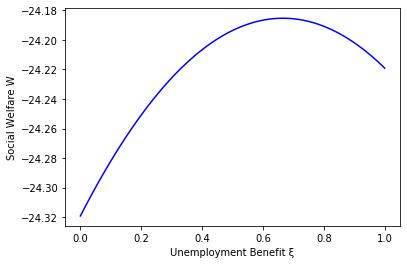

In [20]:
# Social Welfare ----
x_bmk = df_aggregate_bmk['ξ'][[0, 5, 10]]
y_bmk = df_aggregate_bmk['Social Welfare'][[0, 5, 10]]
f_bmk = interp1d(x_bmk, y_bmk, kind='quadratic')
y_bmk = f_bmk(np.linspace(0, 1, 100))

fig, ax = plt.subplots()
ax.plot(np.linspace(0, 1, 100), y_bmk, color='b')
ax.set_ylabel('Social Welfare W')
ax.set_xlabel('Unemployment Benefit ξ')
plt.show()

I find that an unemployment replacement ratio of 0.6 is optimal in my economy. Similar to the original paper, it can be argued, that the government policy partially corrects for potential dynamic inefficiencies by reducing savings thereby aggrevating the problem of too much capital accumulation.

In [9]:
# Table 1 ----
table1_bmk = df_aggregate_bmk.round(decimals=3)
table1_bmk

,ξ,τ_u,wage,interest rate,Consumption,Capital,Income,Social Welfare
0,0.0,0.000,2.298,0.020,0.743,4.054,1.114,-24.319
1,0.1,0.006,2.296,0.021,0.743,4.045,1.114,-24.274
2,0.2,0.013,2.296,0.021,0.743,4.045,1.114,-24.238
3,0.3,0.019,2.297,0.020,0.743,4.050,1.114,-24.159
4,0.4,0.026,2.295,0.021,0.743,4.041,1.113,-24.216
5,0.5,0.032,2.297,0.020,0.743,4.047,1.114,-24.194
6,0.6,0.038,2.296,0.020,0.742,4.046,1.114,-24.199
7,0.7,0.045,2.296,0.021,0.742,4.045,1.114,-24.193
8,0.8,0.051,2.298,0.020,0.742,4.054,1.114,-24.195
9,0.9,0.057,2.297,0.020,0.742,4.050,1.114,-24.209


Each row in the above table represents a different unemployment benefit arrangement. The first column contains the unemployment benefit level and the remaining columns report equilibrium values of aggregate variables where the average utility is reported in the last one. The tax rates to finance the unemployment insurance are rather low, with $3.8 \%$ of average aggregate income to cover the expenses of the optimal reform. An increase in the government arrangement first decreases the capital stock (and hence interest rates rise). After the optimal arrangement has been reached, the capital stock increases again, implying that the individuals accumulate assets. Housheolds might be induced to do so (by higher interest rates) in an effort to increase consumption during retirement once employment risks have been sufficiently covered.

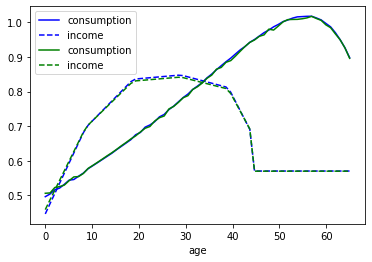

In [21]:
# Figure 3 ----
# Age-income and age-consumption profiles (averages) with a replacement rate of 60 % (third index). We can construct the plot 
# with the help of the households' distribution λ, consumption policies and disposable incomes.
con_age_prof_00_bmk = np.sum(λ_e_bmk[:,:,0] * cpol_e_bmk[:,:,0] + λ_u_bmk[:,:,0] * cpol_u_bmk[:,:,0], axis=0)
inc_age_prof_00_bmk = np.sum(λ_e_bmk[:,:,0] * q_e_bmk[None, :,0] + λ_u_bmk[:,:,0] * q_u_bmk[None, :,0], axis=0)
con_age_prof_60_bmk = np.sum(λ_e_bmk[:,:,6] * cpol_e_bmk[:,:,6] + λ_u_bmk[:,:,6] * cpol_u_bmk[:,:,6], axis=0)
inc_age_prof_60_bmk = np.sum(λ_e_bmk[:,:,6] * q_e_bmk[None, :,6] + λ_u_bmk[:,:,6] * q_u_bmk[None, :,6], axis=0)
age                 = np.linspace(0, J, J)

fig, ax = plt.subplots()
ax.plot(age, con_age_prof_00_bmk, 'blue', label='consumption')
ax.plot(age, inc_age_prof_00_bmk, 'blue', linestyle='dashed', label='income')
ax.plot(age, con_age_prof_60_bmk, 'green', label='consumption')
ax.plot(age, inc_age_prof_60_bmk, 'green', linestyle='dashed', label='income')
ax.set_xlabel('age')
ax.legend()
plt.show()

Having established the optimal unemployment benefit ratio I subsequently compare the two cases of either no unemployment insurance or the optimal level. In the above figure, lifetime consumption and income paths for the two cases are presented. Consumption and Income profiles are not sensitive to the unemployment policy. Income is marginally lower, since employed households need to finance the benefits. As efficiency profiles peak between model age of 20 to 30 the tax burden is especially visible over that area of the domain.

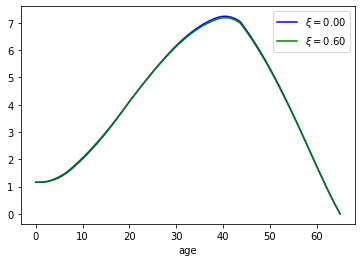

In [22]:
# Figure 5 ----
# Asset (savings) profiles for selected social security replacement profiles. Recall that assets are stored in the ypol arrays.
assets_00_bmk  = np.sum(λ_e_bmk[:,:,0] * ypol_e_bmk[:,:,0] + λ_u_bmk[:,:,0] * ypol_u_bmk[:,:,0], axis=0)
assets_06_bmk = np.sum(λ_e_bmk[:,:,6] * ypol_e_bmk[:,:,6] + λ_u_bmk[:,:,6] * ypol_u_bmk[:,:,6], axis=0)

fig, ax = plt.subplots()
ax.plot(age, assets_00_bmk, 'b', label='$ξ = 0.00$')
ax.plot(age, assets_06_bmk, 'g', label='$ξ = 0.60$')
ax.set_xlabel('age')
ax.legend()
plt.show()

Saving profiles are not affected either. I would have expected that the profile is shifted downwards as agents save less precautionarily if the state fully insures against the unemployment risk. However, the unemployment risk is potentially too small to have a serious impact on overall saving decisions.

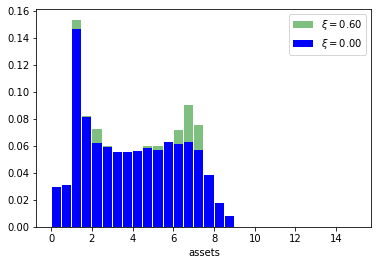

In [23]:
# Figure 6 ----
# Overall asset distribution (again, for ξ = 0.60 and 0.00). Now, we use the household share μ.

# Wealth distribution (array of len 601, summing to 1): gives us for each grid point on the asset_grid the ratio of houesholds
# holding that amount of wealth...
wealth_dist_00_bmk = np.sum(μ[None, :] * (λ_e_bmk[:, :, 0] + λ_u_bmk[:, :, 0]), axis=1)
wealth_dist_06_bmk = np.sum(μ[None, :] * (λ_e_bmk[:, :, 6] + λ_u_bmk[:, :, 3]), axis=1)

fig, ax = plt.subplots()
ax.hist(model.asset_grid(), bins=30, weights=wealth_dist_06_bmk, rwidth=0.9, color='g', alpha=0.5, label='$ξ = 0.60$')
ax.hist(model.asset_grid(), bins=30, weights=wealth_dist_00_bmk, rwidth=0.9, color='b', label='$ξ = 0.00$')
ax.set_xlabel('assets')
ax.legend()
plt.show()

The aggregate asset distribution is slightly altered with higher unemployment benefits. The mass shifts from the tails towards the center.

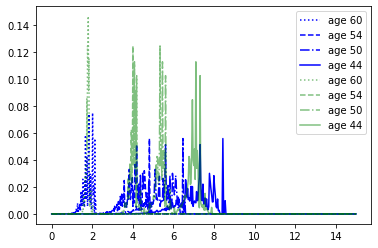

In [13]:
# Figure 7 ----
# Wealth distribution for selected age groups (for ξ = 0.60)
fig, ax = plt.subplots()
ax.plot(model.asset_grid(), λ_e_bmk[:, 60, 0] + λ_u_bmk[:, 60, 0], 'b:', label='age 60')
ax.plot(model.asset_grid(), λ_e_bmk[:, 54, 0] + λ_u_bmk[:, 54, 0], 'b--', label='age 54')
ax.plot(model.asset_grid(), λ_e_bmk[:, 50, 0] + λ_u_bmk[:, 50, 0], 'b-.', label='age 50')
ax.plot(model.asset_grid(), λ_e_bmk[:, 44, 0] + λ_u_bmk[:, 44, 0], 'b', label='age 44')
ax.plot(model.asset_grid(), λ_e_bmk[:, 60, 6] + λ_u_bmk[:, 60, 6], 'g:', label='age 60', alpha=0.5)
ax.plot(model.asset_grid(), λ_e_bmk[:, 54, 6] + λ_u_bmk[:, 54, 6], 'g--', label='age 54', alpha=0.5)
ax.plot(model.asset_grid(), λ_e_bmk[:, 50, 6] + λ_u_bmk[:, 50, 6], 'g-.', label='age 50', alpha=0.5)
ax.plot(model.asset_grid(), λ_e_bmk[:, 44, 6] + λ_u_bmk[:, 44, 6], 'g', label='age 44', alpha=0.5)
ax.legend()
plt.show()

Optimal unemployment benefits at a replacement rate of 0.6 induce smaller wealth differences within cohorts. This is because housheolds having a history of only few unemployed periods get more heavily taxed, whereas households which are frequently unemployed benefit from the insurance and do not need to dissave.

## Possible Extensions
As soon as unemployment persistency is introduced the expectatation about future states becomes contingent on the actual state which entails that multiple value functions need to be recovered (for each state). Theoretically this sounds straight forward but the numerical implementation is for me somewhat more distant. In particular, it would require me to abandon the vectorized (with regard to the employment state) implementation in the simulation function and set up a state grid instead. As already outlined above, the introduction of persistency should be combined with shorter modeling periods (f.ex. monthly). This shorter modeling period would present the opportunity to introduce "business cycles" in the sense of stochastic productivity ($B$) which would introduce a state of nature and hence a further state variable. The risk of unemployment could be aligned with business fluctuations, increasing the risk of unemployment in a downturn. Or at least, the Markov stochastic process for unemployment could be calibrated using f.ex. the Tauchen method. This would though require micro data where unemployment duration is reported.

As already hinted, labor supply decisions could be made endogeneous. However, this introduces a further complication as pension benefits $b$ are predetermined by labor decisions. Hence, the employment and labor choice history introduces a state variable for the retired. Of course, technically, I would also need to guess aggregate labor and require convergence in the labor market clearing condition. The computational burden will be considerable. To reduce this burden, I should become more knowledgable about clever choices for both the value function and the set of choice variable grids. One intuitive possibility would be to define the choice grid of labor as a function of the choice grid of consumption (next period asset holdings) with help of the FOCs... Similarly, the model could be extended by an employment decision (f.ex. incorporating the logic of the McCall search model).

## Conclusion
One could argue, that given the actual unemployment rates, different unemployment schemes only marginally alter aggregate economic outcomes and provide small welfare gains. From this perspective it is probably more important to consider implied incentives of unemployment benefits such as how employment choices (reservation wages) are impacted by different arrangements. However, the employment history introduces considerable wealth inequalities within a given cohort and a suitable policy arrangement narrows the spread of the distribution. In that regard, I find that a replacement rate of 0.6 is optimal and considerably smoothes asset holdings across age-cohorts (and hence different employment histories).

Further increasing the replacement rate (beyond the optimal level) might lead to crowding-in private asset accumulation potentially increasing dynamic inefficiencies within the economy. People might increase savings because employment risks are sufficiently covered by the government and capital returns are higher than before the government intervention.

The modeling framework has a very limited view of unemployment and is not able to capture the real job market situation where people face long-term unemployment. A more accurate perspective could be realized when allowing for more complexe stochastic processes with persitency or a modeling approach allowing for employment choices.

I further conclude that inherited wealth does not considerably change economic outcomes as bequests only represent a small fraction of total wealth and only benefit very few people.

It would be advisable to compute the social planner's objective in order to gauge the degree of dynamic inefficiency as was done in the original paper. Further, the outcome should be scrutinized with multiple robustness checks. Of course, changing the parameters governing the risk aversion $\gamma$ or the discount factor $\beta$ might lead to a different conclusion. Generally, the sensitivity of the results to such parameters casts doubt on the validity. In particular, because empirical studies suggest a wide range of potential values.